# Exploratory Data Analysis

**Business Objective**:  Train an ML model using PyCaret to predict the selling price of a used car in India based on its characteristics, e.g. kilometers driven, fuel type, transmission, mileage, etc. 

**Dataset**: Used Car Prices

**Dataset Description**: The dataset, which is in Microsoft Excel format, contains several characteristics of used cars in India such as kilometers driven, fuel type, transmission, mileage, etc.

**Column Description**:-

Brand_Model: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM. 

Fuel_Type: The type of fuel used by the car. (Petrol / Diesel / Electric / CNG / LPG)

Transmission: The type of transmission used by the car. (Automatic / Manual)

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg.

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

We will first begin by importing necessary libraries and reading the dataset into this notebook.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ingest the dataset and display the first 5 rows
df = pd.read_excel('02_Used_Car_Prices.xlsx')
df.head()

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,1774000.0


As a common practice, we will check how many rows and columns the dataset has.

In [3]:
# Check number of rows and columns
df.shape

(6019, 12)

We can see that it is a relatively small dataset, having only 6019 rows and 12 columns. Next, we will use info() method to see more detailed information on the dataset.

In [4]:
# Use info() method to see more detailed view
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price (INR Lakhs)  6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


The output shows that the dataset does not have a lot of missing values, shown by non-null count. However, this is not our concern as this will be addressed later in the model building process using PyCaret, which handles data preprocessing and transformation easily. Data types are a mix of object (8), integer (2), and float (2) data types, mostly consisting of objects (string).

We will also check how many duplicate rows there are as a common practice, though, like mentioned, PyCaret can deal with these rows (by removing them) later without us needing to do anything.

In [5]:
# Check number of duplicate rows
print("Number of duplicate records:", df.duplicated().sum())

Number of duplicate records: 0


We found out that there are no duplicates, which is good since that means we won't lose any data as there is no need for later removal of rows. Next, we will look at distribution of price (which is the target variable) for all the cars in the dataset, by using a histogram.

## Univariate Analysis

Text(0.5, 1.0, 'Car Price Distribution (Histogram)')

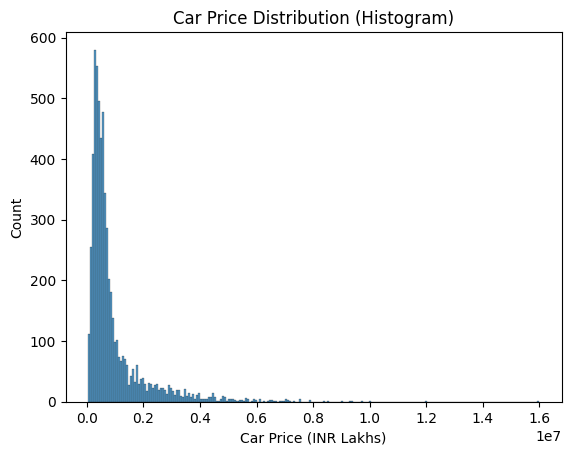

In [6]:
# Distribution of car price
sns.histplot(data=df, x='Price (INR Lakhs)')
plt.xlabel('Car Price (INR Lakhs)')
plt.title('Car Price Distribution (Histogram)')

The above histogram reveals that most car price are in the lower ranges, showing right-skewed data distribution. Since we suspect that there may be outliers among the price range, we will also use boxplot to visualise the distribution in a different way.

Text(0.5, 1.0, 'Car Price Distribution (Boxplot)')

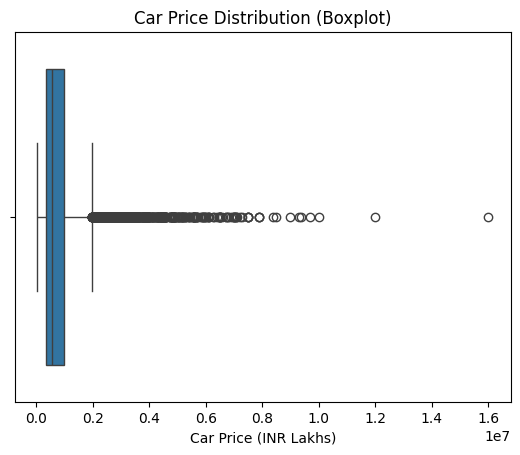

In [7]:
# Use boxplot to visualise distribution of price
sns.boxplot(data=df, x='Price (INR Lakhs)')
plt.xlabel('Car Price (INR Lakhs)')
plt.title('Car Price Distribution (Boxplot)')

The above boxplot shows us that there are many outliers when it comes to car price. We will calculate the exact number of outliers present in the data in the following cell.

In [8]:
# Calculate outliers for price
Q1 = df['Price (INR Lakhs)'].quantile(0.25)
Q3 = df['Price (INR Lakhs)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price (INR Lakhs)'] < lower_bound) | (df['Price (INR Lakhs)'] > upper_bound)]
outliers_pct = round((len(df) / len(outliers)), 2)

print(f"Number of outliers for price: {len(outliers)}")
print(f"Percentage of outliers for price: {outliers_pct}%")

Number of outliers for price: 718
Percentage of outliers for price: 8.38%


We found that outliers in price column contribute 8.38% of the entire dataset. We will decide to remove them in the model building process as some models such as linear regression are sensitive to outliers. For now, we will move on to visualising the distribution of number of seats among the cars using a histogram.

Text(0.5, 1.0, 'Distribution for Number of Seats')

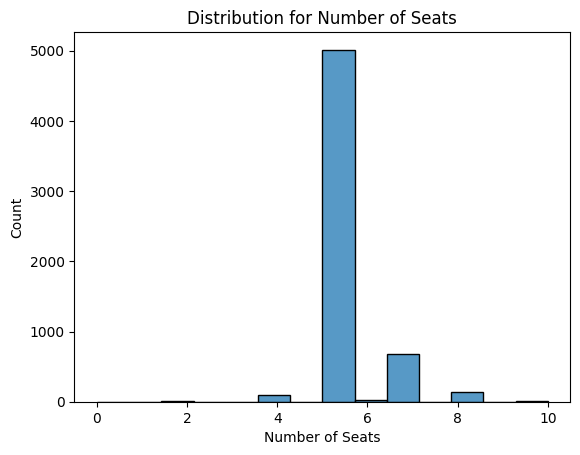

In [9]:
# Visualise distribution of number of seats
sns.histplot(data=df, x='Seats')
plt.xlabel('Number of Seats')
plt.title('Distribution for Number of Seats')

The above histogram tells us that most cars have 5 seats, followed by models with 7 seats, 8 seats, and so on. This is expected, as a typical car layout includes a driver’s seat, a front passenger seat, and three seats in the rear. Meanwhile, larger vehicles, such as vans, often offer 7 or more seats. Next, we will use description() method to look at overall view of data distribution across all the numeric columns.

In [10]:
# Use describe() to view data distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742e+00,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,58738.380296,9.126884e+04,171.0,34000.0,53000.0,73000.0,6500000.0
Seats,5977.0,5.278735,8.088396e-01,0.0,5.0,5.0,5.0,10.0
Price (INR Lakhs),6019.0,947946.835022,1.118792e+06,44000.0,350000.0,564000.0,995000.0,16000000.0


The output shows that the earliest year in the dataset is 1998 and 2019 the latest. When it comes to kilometers driven by the cars, it ranges from 171 (minimum) to 6.5M kilometers, varying greatly. It's average value is 58378.38 kilometers, indicating that the distribution is skewed to the right, highlighting potential outliers (which we will deal with later, as mentioned) similar to price.

Looking at seats, it further confirms our finding that most cars have 5 seats, shown by 25 to 75 percentiles, and 10 being seemingly an outlier range. Price, as we saw earlier, ranges from 44k to 16M Indian Rupee, showing great variation and right-skewed distribution.

Next, we will explore on object columns, such as number of unique values, count distribution and so on. First, we will take a look at the number of unique values each object column has.

In [11]:
# Check number of unique values for each object/string column
df.select_dtypes(include='object').nunique()

Brand_Model     1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          442
Engine           146
Power            372
dtype: int64

The output reveals that there are 1876 brand models, 11 location, 5 fuel type, 2 transmission type, and 4 owner type. As brand model has high cardinality, we will remove it during the model building process as high cardinality column as such is unlikely to be useful for the price prediction. Moreover, it will make the dataset sparse as it will result in many columns with 0 when one-hot encoding is applied.

One interesting thing we find out here is that columns such as mileage, engine, and power have high cardinality. However, this may not be because they are categorical columns in nature. We will look at the first 5 rows to see what is going on.

In [12]:
# View first 5 rows for more understanding
df.head()

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,1774000.0


We discovered that mileage, engine, and power columns are actually numeric columns with their corresponding suffixes (km/kg for mileage, CC for engine, and bhp for power). We will need to do some transformation on those columns so that we can get meaningful analyses on them, treating them as numeric columns. Therefore, we will perform that in the following cell, by removing corresponding suffixes from mileage, engine, and power columns, using regular expression.

In [13]:
# Remove corresponding suffixes from Mileage, Engine, and Power columns
df['Mileage'] = df['Mileage'].astype(str).str.replace(r'\s*(km/kg|kmpl)', '', regex=True)
df['Engine']  = df['Engine'].astype(str).str.replace(r'\s*CC', '', regex=True)
df['Power']   = df['Power'].astype(str).str.replace(r'\s*bhp', '', regex=True)

In [14]:
# Check data types again
df[['Mileage', 'Engine', 'Power']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mileage  6019 non-null   object
 1   Engine   6019 non-null   object
 2   Power    6019 non-null   object
dtypes: object(3)
memory usage: 141.2+ KB


In [15]:
# Convert from object to float
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')  #errors='coerce' is so that it converts anything unconvertible to NaN
df['Engine']  = pd.to_numeric(df['Engine'], errors='coerce')
df['Power']   = pd.to_numeric(df['Power'], errors='coerce')

Next, we will visualise the distribution of those transformed columns we were not able to do before, using histograms.

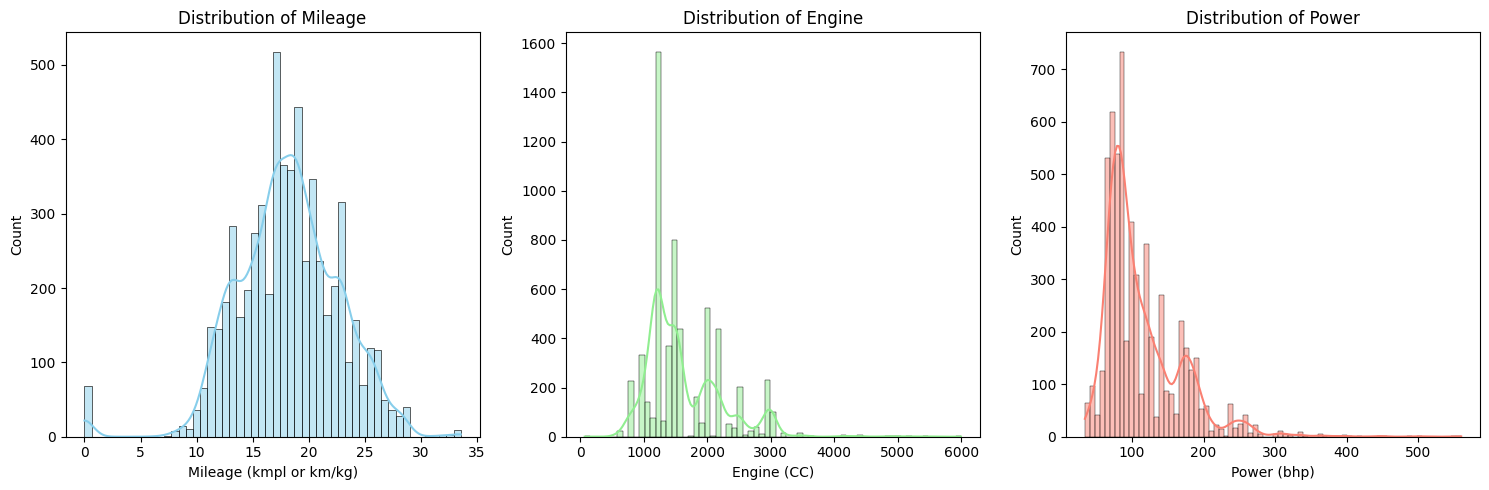

In [16]:
# Visualise distribution of Mileage, Engine, and Power columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Mileage'], kde=True, ax=axes[0], color='skyblue')  #kde=True adds a smooth curve for better distribution insight
axes[0].set_title('Distribution of Mileage')
axes[0].set_xlabel('Mileage (kmpl or km/kg)')

sns.histplot(df['Engine'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Engine')
axes[1].set_xlabel('Engine (CC)')

sns.histplot(df['Power'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribution of Power')
axes[2].set_xlabel('Power (bhp)')

plt.tight_layout()
plt.show()

The mileage appears to follow an approximately normal distribution, while most engine sizes are concentrated in the lower range. Similarly, a large number of cars have relatively low power values, displaying right-skewed distribution. Now, we will go back to exploring the categorical columns. As mentioned, we are not really interested in brand model column as it has high cardinality (1876 different brands). We will look at the distribution of the remaining categorical columns, such as fuel type, transmission, and owner type, using horizontal bar charts.

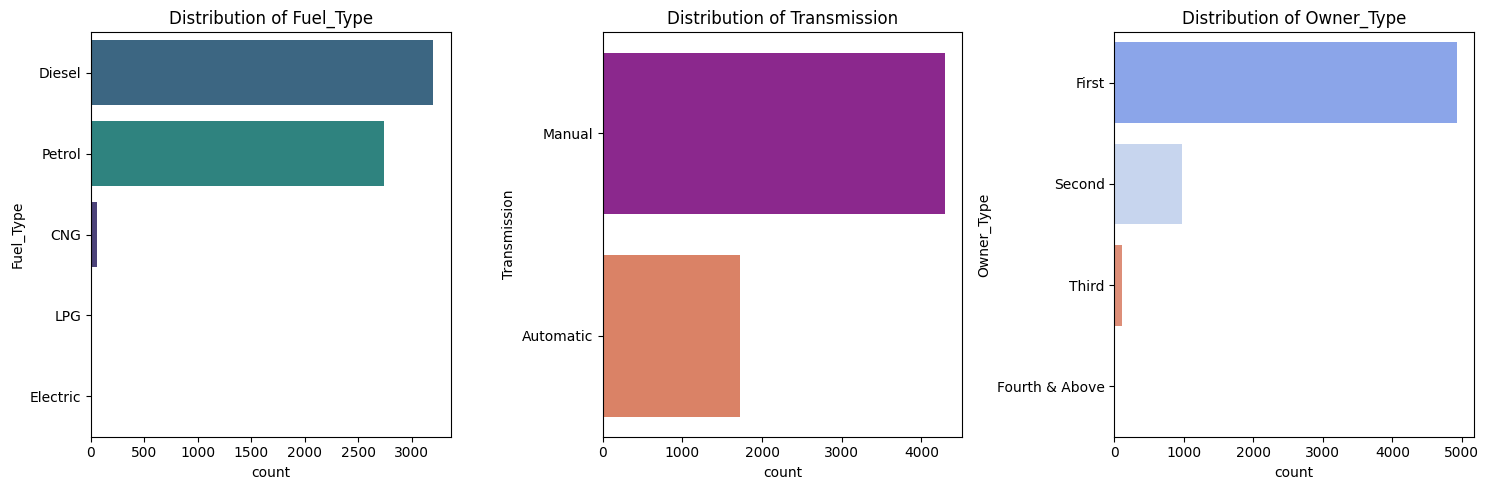

In [43]:
# Visualise categorical distributions using horizontal bar chart
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cat_cols = ['Fuel_Type', 'Transmission', 'Owner_Type']
colors = ['viridis', 'plasma', 'coolwarm']

for i, cat_col in enumerate(cat_cols):
    order = df[cat_col].value_counts().index
    sns.countplot(data=df, y=cat_col, hue=cat_col, ax=axes[i], palette=colors[i], order=order)
    axes[i].set_title(f'Distribution of {cat_col}')
    
plt.tight_layout()
plt.show()

For Fuel Type, diesel is the most common among cars, followed by petrol, Compressed Natural Gas (CNG), Liquefied Petroleum Gas (LPG), and finally electric vehicles. Regarding transmission, manual cars are far more prevalent than automatic ones. As for owner type, the majority of cars are first-hand, followed by second-hand, third-hand, and fourth-hand or higher. Next, we will move on to identifying any potential relationship between the numerical variables using scatterplots.

## Multivariate Analysis

First, we will find out whether there is any correlation between some numeric variables (kilometers driven, mileage, etc.) and the price of the car.

In [45]:
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Mileage            6017 non-null   float64
 3   Engine             5983 non-null   float64
 4   Power              5876 non-null   float64
 5   Seats              5977 non-null   float64
 6   Price (INR Lakhs)  6019 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 329.3 KB


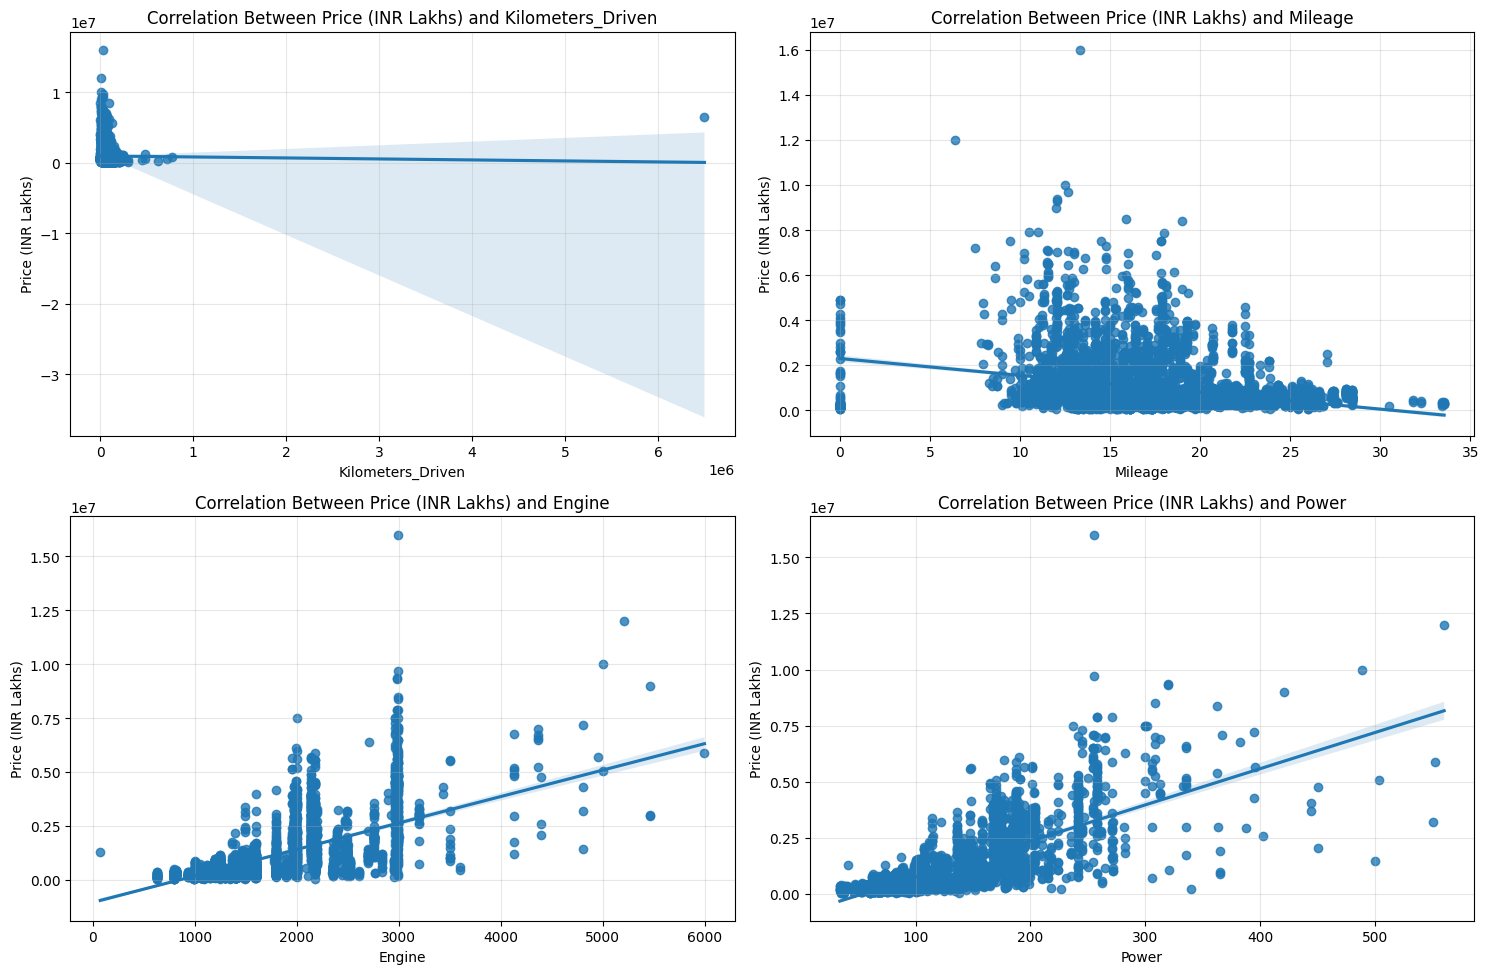

In [70]:
# Correlation between some numeric columns and car price
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

numerical_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']
target = 'Price (INR Lakhs)'

for i, col in enumerate(numerical_cols):
    sns.regplot(data=df, x=col, y=target, ax=axes[i])
    axes[i].set_title(f'Correlation Between {target} and {col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The above subplots indicate that kilometers driven and mileage do not show any noticeable correlation with car price. In contrast, engine size and power exhibit moderate positive relationships with price, suggesting that these features could be relevant predictors for estimating a car’s value. Next, similarly, we will use a heatmap to enhance our findings on the correlations, but this time, quantitatively.

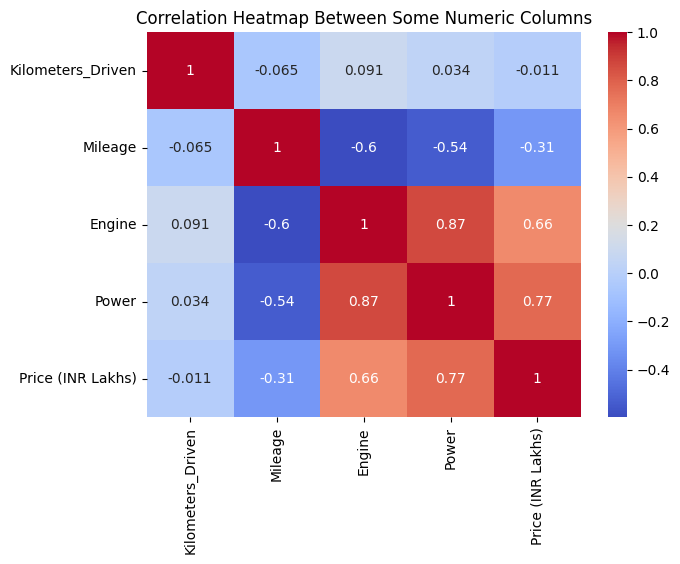

In [89]:
# Use heatmap to visualise correlations (displayed values are correlation coefficients)
numerical_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price (INR Lakhs)']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Some Numeric Columns')
plt.show()

The correlation heatmap reinforces the earlier observation of a moderate positive correlation between engine size and power with car price. In contrast, the correlation coefficient for mileage shows a weak negative relationship with price, suggesting it may hold some predictive value for estimating a car’s price. Next, we will look at how used car prices change over time. We will look at the trends based on fuel type as well as transmission type.

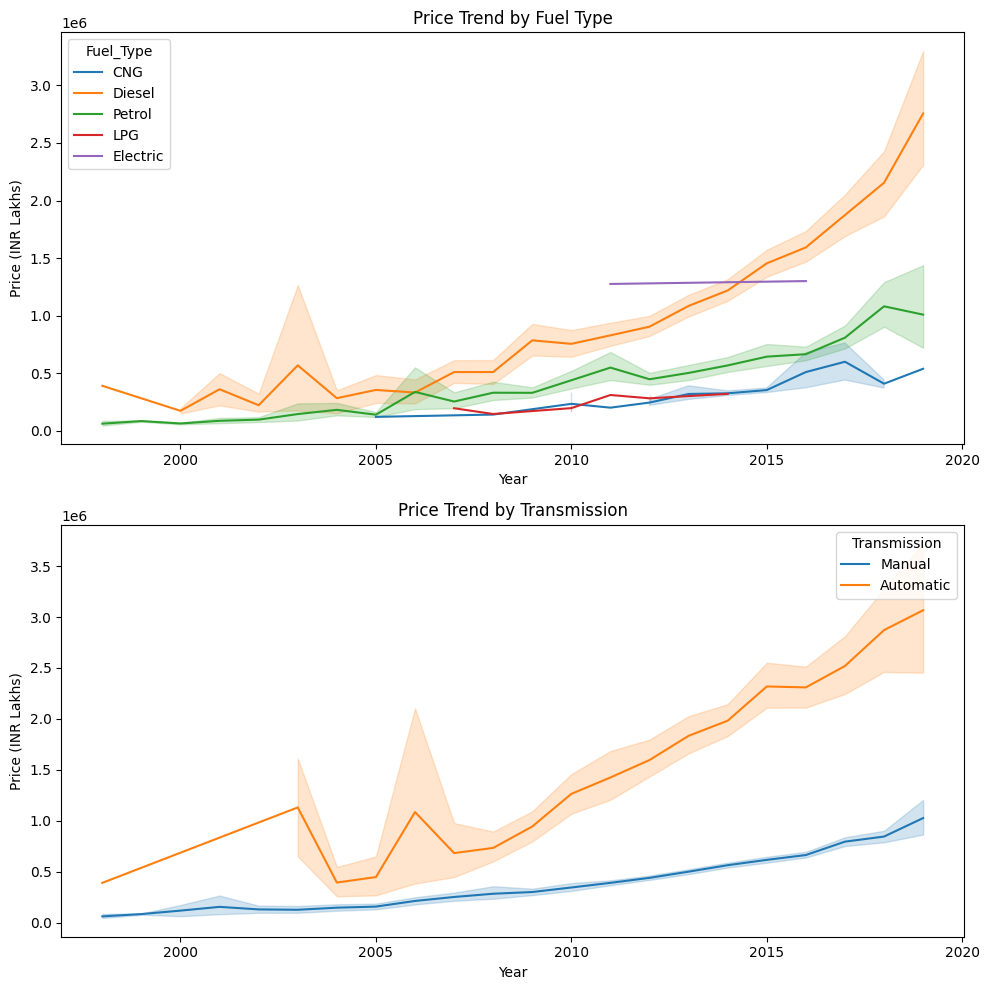

In [102]:
# Car price trend based on fuel type and transmission type
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(data=df, x='Year', y='Price (INR Lakhs)', hue='Fuel_Type', ax=axes[0])
axes[0].set_title('Price Trend by Fuel Type')

sns.lineplot(data=df, x='Year', y='Price (INR Lakhs)', hue='Transmission', ax=axes[1])
axes[1].set_title('Price Trend by Transmission')

plt.tight_layout()
plt.show()

Regarding price trends by fuel type, diesel cars have shown a steady overall price increase from 1998 to 2019, with some fluctuations seen between the year 2000 and 2005. Petrol cars, on the other hand, have experienced a smaller increase compared to diesel, with a slight decline between 2018 and 2019. For CNG, LPG, and electric cars, the data is sparse, price lines appear only in segments rather than continuously across the 21-year period, indicating their limited presence.

For transmission type trends, automatic cars have experienced notable fluctuations, particularly between 2003 and 2007, followed by an overall upward trend until 2019. In contrast, manual transmission cars have maintained a smoother and more gradual price increase over the same period.

With this, we will conclude our exploratory data analysis on our used car price dataset.

### Summary of this EDA Task

The dataset contains a mix of numeric and categorical features with minimal missing values and no duplicates. Price distribution is highly right-skewed with 8.38% outliers, which will be addressed during model building. Most cars have 5 seats, and numeric features like mileage, engine, and power required cleaning to remove unit suffixes for proper analysis. Categorical analysis revealed diesel as the dominant fuel type, manual as the most common transmission, and firsthand as the primary ownership type.

Correlation analysis showed moderate positive relationships between engine size and power with car price, while mileage displayed a weak negative correlation. Price trends over time indicated steady growth for diesel vehicles, smaller increases for petrol, and limited data for CNG, LPG, and electric cars. Automatic cars experienced more fluctuations in price trends compared to the smoother, gradual increase observed in manual cars.

In addition to performing exploratory data analysis, we applied light transformations, specifically removing unit suffixes from certain categorical columns to convert them into proper numerical values. Therefore, we will export the cleaned DataFrame and use it instead of the original dataset, for building machine learning models with PyCaret. We will do that using the following cell.

In [104]:
# Export the dataframe as light data transformations were applied
df.to_excel('02_Used_Car_Prices_Modified.xlsx', index=False)